# Домашняя работа 2. Логистическая регрессия.

### Оценивание и штрафы

Максимальная оценка — 10 баллов. Еще есть 2 бонусных балла, которые можно добавить к любым домашкам или проверочным.

Не списывайте, иначе всем участникам обнулим :)

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка: 9**

In [133]:
print('Всем удачи!👒')

Всем удачи!👒


In [134]:
from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Часть 1. Логрег своими руками (5.5 балла)

**Задание 1 (5 баллов)**. Реализуйте логистическую регрессию, обучаемую с помощью:
- градиентного спуска **(2.5 балла)**

- стохастического градиентного спуска **(2.5 балла)**

Во всех пунктах необходимо соблюдать два условия:
- Циклы можно использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

    - проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$), задаваемого параметром `tolerance`;
    - достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, добавим атрибут класса `loss_history`. В нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций градиентного спуска, начиная с нулевой.

Инициализировать веса можно случайным образом или нулевым вектором.

In [135]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type: str = 'stochastic', tolerance: float = 1e-4, 
                 max_iter: int = 1000, eta: float = 1e-2,
                 w0: np.array = None) -> None:
        """
        Args:
          gd_type: Type of gradient descent ('full' or 'stochastic'). 
          
          tolerance: Threshold for stopping gradient descent.
          
          max_iter: Maximum number of steps in gradient descent.
          
          eta: Learning rate.
          
          w0: Array of shape d (d — number of weights to optimize).
              Initial weights.
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.eta = eta
        self.w0 = w0
        self.w = None
        self.loss_history = None

    def fit(self, X: np.array, y: np.array) -> LogReg:
        """Fit the model on training data. Also, save value of loss after each iteration.
        
        Args:
          X: Training data.
          
          y: Target.
        
        Returns: 
          self: Fitted classsifier.  
        """
        self.w = self.w0
        self.loss_history = []    
        self.loss_history.append(self.calc_loss(X,y))
                
        if self.gd_type =='full':
          self.w = self.w0 - self.eta*self.calc_gradient(X,y)
          for i in range(self.max_iter):
            if np.linalg.norm(self.w-self.w0, ord=2)> self.tolerance:
              self.w0 = self.w
              self.w = self.w - self.eta*self.calc_gradient(X,y)
              self.loss_history.append(self.calc_loss(X,y))
        else:
          r = np.random.randint(len(y))
          self.w = self.w0 - self.eta*self.calc_gradient(np.array([X[r, :]]),[y[r]])
          for i in range(self.max_iter):
            if np.linalg.norm(self.w-self.w0, ord=2)> self.tolerance:
              self.w0 = self.w
              r = np.random.randint(len(y))            
              self.w = self.w - self.eta*self.calc_gradient(np.array([X[r, :]]),[y[r]])
              self.loss_history.append(self.calc_loss(X,y))
        return self

    def sigmoid(self, x):
      return 1/(1 + np.exp(-x))
    
    def predict_proba(self, X: np.array) -> np.array:
        """Calculate probability of positive and negative class for each observation.
        
        Args:
          X: Array of shape (n, d).
             Data.
        
        Returns: 
             Array of shape (n, 2).
             Predicted probabilities.
        """
  
        if self.w is None:
            raise Exception('Not trained yet')
        return np.array([self.sigmoid(X@self.w),1-self.sigmoid(X@self.w)])
        pass
    
    
    def predict(self, X: np.array) -> np.array:
        """Predict class for each observation.
        
        Args:
          X: Array of shape (n, d).
             Data.
        
        Returns: 
             Array of shape (n,).
             Predicted class labels.  
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        y_pred = self.predict_proba(X)[0,:]
        y_pred[y_pred>0.5] = 1
        y_pred[y_pred<=0.5] = 0
        
        return y_pred
        pass
    
    def calc_gradient(self, X: np.array, y: np.array) -> np.array:
        """Calculate gradient of loss function after each iteration.
        
        Args:
          X: Array of shape (n, d), n can be equal to 1 if 'stochastic'.
          y: Array of shape (n,).
        
        Returns:
          Array of shape (d,).
          Gradient of loss function after current iteration.
        """
        Grad = X.T@(self.sigmoid(X@self.w)-np.array(y))
        return Grad
        pass

    def calc_loss(self, X: np.array, y: np.array) -> float:
        """Calculate value of loss function after each iteration.
        
        Args:
          X: Array of shape (n, d).
          y: Array of shape (n,).
        
        Returns:
          Value of loss function after current iteration.
        """ 
        l = len(y)
        S = X @ self.w
        Logloss = ((-y).T@np.log(0.00001+self.sigmoid(S))-(1-y).T@np.log(0.00001+1-self.sigmoid(S)))/l
        return Logloss
        pass

Далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

В части 2 и далее мв бы всем советовали использовать реализацию sklearn.

Сгенерируем синтетические данные.

In [136]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Задание 2 (0.5 балла).** Обучите логистическую регрессию на синтетических данных. Нарисуйте изменение лосса во время обучения.

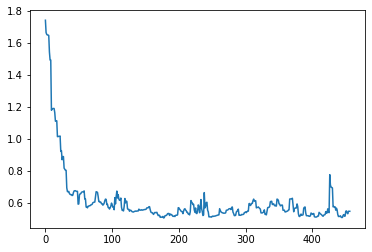

In [137]:
reg = LogReg(w0=np.ones(10),eta=0.045)

reg.fit(X_train,y_train)

plt.plot(reg.loss_history)
plt.show()

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

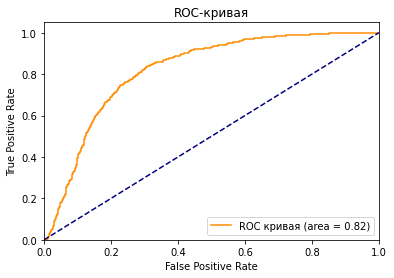

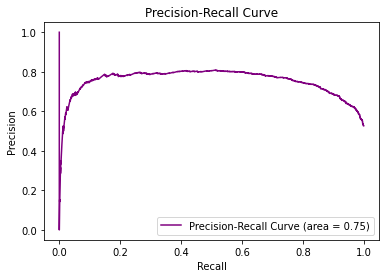

In [138]:
from sklearn.metrics import roc_curve, auc
from sklearn. metrics import precision_recall_curve

PosProb = reg.predict_proba(X_test)[0,:]


fpr, tpr, treshold = roc_curve(y_test,PosProb)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

precision, recall, threshold = precision_recall_curve(y_test,PosProb)
pr_auc = auc(recall,precision)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label='Precision-Recall Curve (area = %0.2f)' % pr_auc)
plt.legend(loc="lower right")
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show() 



## Часть 2. Работа с категориальными признаками (2.5 балла)

В этой части мы научимся обрабатывать категориальные переменные. Как вы уже знаете, закодировать их в виде столбика чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть, но модель попробует его выучить). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о маркетинговой кампании какого-то банка, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной — ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы — более подробная информация на страничке с датасетом.

In [139]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

--2022-11-13 19:37:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.5’

bank-additional.zip 100%[===================>] 434.15K  1.77MB/s    in 0.2s    

2022-11-13 19:37:56 (1.77 MB/s) - ‘bank-additional.zip.5’ saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [140]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, укажите значение параметра `stratify`. Один из столбцов (помимо таргета :) ) стоит сразу выкинуть из обучающей выборки. Какой? Не отказывайте себе. 



In [141]:

df.info()
print(df.nunique()) # как видим duration имеет очень большое значение + из информации с датасетом на нем неправаильно обучать

df.drop(columns = ['duration'],axis = 1, inplace=True)

X_train,X_test,y_train,y_test = train_test_split(df[df.drop(columns = ['y'],axis = 1).columns],df['y'],test_size=0.25, random_state=777,stratify=df['y'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Здесь и далее для реализации последовательности этих действий (обработка признаков + обучение модели) используйте пайплайны. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__: Пользуемся AUC-PR, так как Precision и recall слабо зависят от соотношения классов и применимы для дисбалансных выборок.

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


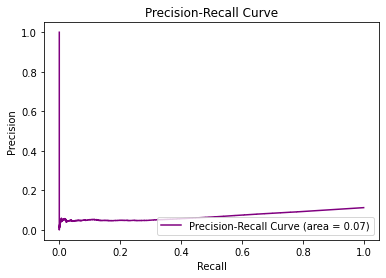

CPU times: user 1.12 s, sys: 576 ms, total: 1.69 s
Wall time: 993 ms


In [143]:
%%time
types = X_train.dtypes
col = types[types[:,]=='object'].index

# X_train
enc_1 = OrdinalEncoder()
enc_1.fit(df[df.drop(columns = ['y'],axis = 1).columns][col])

data_1 = pd.DataFrame(enc_1.transform(X_train[col]))



#склейка таблиц:
data_0 = np.concatenate((np.array(X_train.drop(columns = col,axis = 1)),np.array(data_1)),axis=1)

# X_test
types_2 = X_test.dtypes
col_1 = types_2[types_2[:,]=='object'].index

data_2 = pd.DataFrame(enc_1.transform(X_test[col_1]))

#склейка таблиц:
data_0_test = np.concatenate((np.array(X_test.drop(columns = col_1,axis = 1)),np.array(data_2)),axis=1)

#таргеты
enc3 = OrdinalEncoder()

y_train = enc3.fit_transform(np.array(y_train).reshape(-1, 1)).T[0]
y_test = enc3.fit_transform(np.array(y_test).reshape(-1, 1)).T[0]

logreg_2 = LogisticRegression()
logreg_2.fit(np.array(data_0),y_train)

PosProb = logreg_2.predict_proba(data_0_test)[:,0]

precision, recall, threshold = precision_recall_curve(y_test, PosProb)
pr_auc = auc(recall,precision)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label='Precision-Recall Curve (area = %0.2f)' % pr_auc)
plt.legend(loc="lower right")

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()


__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели. Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refe

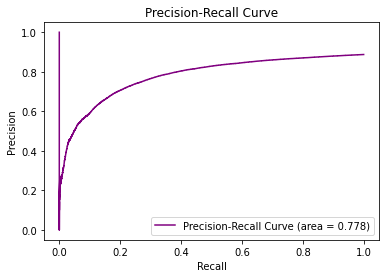

CPU times: user 1.69 s, sys: 584 ms, total: 2.27 s
Wall time: 1.34 s


In [144]:
%%time
types = X_train.dtypes
col = types[types[:,]=='object'].index

# X_train
enc_1 = OneHotEncoder(handle_unknown='ignore')
enc_1.fit(df[df.drop(columns = ['y'],axis = 1).columns][col])

names = np.concatenate(np.array(enc_1.categories_))
data_1 = pd.DataFrame(enc_1.transform(X_train[col]).toarray())
data_1.columns = names

#склейка таблиц:
data_1.loc[:, "N"] = np.arange(0,len(data_1),1)
dat = X_train.drop(columns = col,axis = 1)
dat.loc[:, "N"] = np.arange(0,len(data_1),1)
data_0 = dat.merge(data_1,left_on='N', right_on='N',how="outer")
data_0.drop(columns = ['N'],axis = 1,inplace=True)

# X_test
types_2 = X_test.dtypes
col_1 = types_2[types_2[:,]=='object'].index

names_2 = np.concatenate(np.array(enc_1.categories_))
data_2 = pd.DataFrame(enc_1.transform(X_test[col_1]).toarray())
data_2.columns = names_2

#склейка таблиц:
data_2.loc[:, "N"] = np.arange(0,len(data_2),1)
dat_2 = X_test.drop(columns = col_1,axis = 1)
dat_2.loc[:, "N"] = np.arange(0,len(data_2),1)
data_0_test = dat_2.merge(data_2,left_on='N', right_on='N',how="outer")
data_0_test.drop(columns = ['N'],axis = 1,inplace=True)


#таргеты
enc3 = OneHotEncoder(handle_unknown='ignore', sparse=False)

y_train = enc3.fit_transform(np.array(y_train).reshape(-1, 1)).T[0]
y_test = enc3.fit_transform(np.array(y_test).reshape(-1, 1)).T[0]

logreg_2 = LogisticRegression()
logreg_2.fit(np.array(data_0),y_train)

PosProb = logreg_2.predict_proba(data_0_test)[:,0]

precision, recall, threshold = precision_recall_curve(y_test, PosProb)
pr_auc = auc(recall,precision)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label='Precision-Recall Curve (area = %0.3f)' % pr_auc)
plt.legend(loc="lower right")
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


Время сильно возросло, так как увеличилось количество признаков.

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (0.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


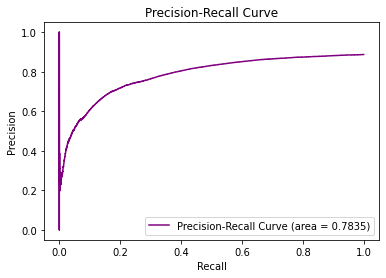

CPU times: user 1.69 s, sys: 565 ms, total: 2.25 s
Wall time: 1.56 s


In [145]:
%%time
types = X_train.dtypes
col = types[types[:,]=='object'].index
data_1 = pd.DataFrame([])
data_2 = pd.DataFrame([])

for c in col:
  c_train = np.array(X_train[c])
  unic = {}
  for i in range(len(c_train)):
    elem = c_train[i]
    if elem not in unic:
      unic[elem] = 1
      unic['sum'+elem] = y_train[i]
    else:
      unic[elem] +=1
      unic['sum'+elem] += y_train[i]
  for i in range(len(c_train)):
    elem = c_train[i]
    c_train[i] = unic['sum'+elem]/unic[elem]
  data_1[c] = c_train
  #test
  c_test = np.array(X_test[c])
  unic = {}
  for i in range(len(c_test)):
    elem = c_test[i]
    if elem not in unic:
      unic[elem] = 1
      unic['sum'+elem] = y_test[i]
    else:
      unic[elem] +=1
      unic['sum'+elem] += y_test[i]
  for i in range(len(c_test)):
    elem = c_test[i]
    c_test[i] = unic['sum'+elem]/unic[elem]
  data_2[c] = c_test


data_0 = np.concatenate((np.array(X_train.drop(columns = col,axis = 1)),np.array(data_1)),axis=1)
data_0_test = np.concatenate((np.array(X_test.drop(columns = col,axis = 1)),np.array(data_2)),axis=1)

logreg_3 = LogisticRegression()
logreg_3.fit(np.array(data_0),y_train)

PosProb = logreg_3.predict_proba(data_0_test)[:,0]

precision, recall, threshold = precision_recall_curve(y_test, PosProb)
pr_auc = auc(recall,precision)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label='Precision-Recall Curve (area = %0.4f)' % pr_auc)
plt.legend(loc="lower right")
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Время на обучение + персчет сопоставимо с one-hot кодированием, при этом метрика стала чуть лучше. Изначально предполагал, что время будет меньше, однако пересчет данных оказался сопоставимым по времени с one-hot.

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем «утечку» целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении счетчика для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Вносить шум в посчитанные признаки. 

__Задание 6 (0.5 балла).__ Реализуйте корректное вычисление счётчиков самым простым способом — добавлением шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.
Какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием можно отметить?

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


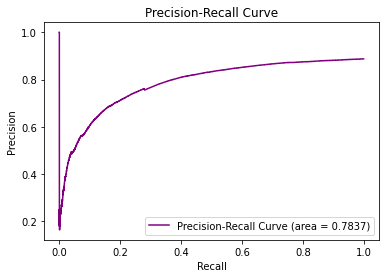

[[33.0 7.0 999.0 ... 0.6380998649603975 0.7131489496370309
  0.8079356212330825]
 [32.0 1.0 999.0 ... 0.4609763993766648 1.2984138866187829
  0.8571449380228212]
 [27.0 1.0 999.0 ... 0.6221781757015014 0.8291393463449591
  1.0042209342135904]
 ...
 [39.0 5.0 999.0 ... 1.0794850053261502 0.6493475084052435
  1.1652131215792854]
 [42.0 1.0 999.0 ... 0.5084602173704992 1.1470513971773237
  0.781533870239672]
 [47.0 3.0 999.0 ... 0.9142380824758385 0.7130520422749139
  0.9652163251432906]]


In [146]:
a = 0.5
data_1 = np.array(data_1)
data_2 = np.array(data_2)
for j in range(len(data_1)):
  for i in range(len(data_1[0])):
    data_1[j,i] += np.random.uniform(-a, a)
for j in range(len(data_2)):
  for i in range(len(data_2[0])):
    data_2[j,i] += np.random.uniform(-a, a)

data_0 = np.concatenate((np.array(X_train.drop(columns = col,axis = 1)),np.array(data_1)),axis=1)
data_0_test = np.concatenate((np.array(X_test.drop(columns = col,axis = 1)),np.array(data_2)),axis=1)


logreg_4 = LogisticRegression()
logreg_4.fit(np.array(data_0),y_train)

PosProb = logreg_4.predict_proba(data_0_test)[:,0]

precision, recall, threshold = precision_recall_curve(y_test,PosProb)
pr_auc = auc(recall,precision)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label='Precision-Recall Curve (area = %0.4f)' % pr_auc)
plt.legend(loc="lower right")

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show() 
print(data_0)

Счетчики занимают меньше памяти,модель по идее быстрее обучается, но дольше пересчитывается. One-hot чуть быстрее, незначительно хуже метрика, долго происходит обучение за счет большого количества признаков.

__Задание 7 (0.5 балла).__ В данных имеется признак «возраст клиента». Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [147]:
#train
Age_train = np.array(X_train.age,dtype=float)
unic = {}
for i in range(len(Age_train)):
  elem = Age_train[i]
  if elem not in unic:
    unic[elem] = 1
    unic[-elem] = y_train[i]
  else:
    unic[elem] +=1
    unic[-elem] += y_train[i]
for i in range(len(Age_train)):
  elem = Age_train[i]
  Age_train[i] = unic[-elem]/unic[elem]

#test
Age_test = np.array(X_test.age,dtype=float)
unic = {}
for i in range(len(Age_test)):
  elem = Age_test[i]
  if elem not in unic:
    unic[elem] = 1
    unic[-elem] = y_test[i]
  else:
    unic[elem] +=1
    unic[-elem] += y_test[i]
for i in range(len(Age_test)):
  elem = Age_test[i]
  Age_test[i] = unic[-elem]/unic[elem]

col = col.append(pd.Index(['age'])) 

data_0 = np.concatenate((np.array(X_train.drop(columns = col,axis = 1)),data_1),axis=1)
data_0 = np.column_stack((data_0, Age_train.T))
data_0_test = np.concatenate((np.array(X_test.drop(columns = col,axis = 1)),data_2),axis=1)
data_0_test = np.column_stack((data_0_test, Age_test.T))
print(pd.unique(df.age))
print(len(pd.unique(df.age))) # уникальных значений


[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
78


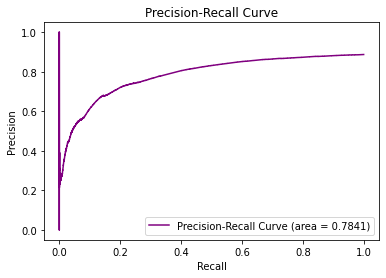

In [148]:
logreg_5 = LogisticRegression()
logreg_5.fit(np.array(data_0),y_train)

PosProb = logreg_5.predict_proba(data_0_test)[:,0]

precision, recall, threshold = precision_recall_curve(y_test, PosProb)
pr_auc = auc(recall,precision)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label='Precision-Recall Curve (area = %0.4f)' % pr_auc)
plt.legend(loc="lower right")
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Стало чуть лучше.

Можно пойти и в обратную сторону. У нас есть признаки «месяц и день недели» для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


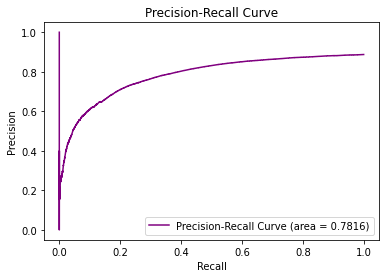

In [149]:
mon_train = np.array(X_train.month)
day_train = np.array(X_train.day_of_week)
mon_test = np.array(X_test.month)
day_test = np.array(X_test.day_of_week)
dict_m ={}
dict_day = {}

month = np.array(pd.unique(df.month))
day_of_week = np.array(pd.unique(df.day_of_week))

for i in range(len(month)):
  dict_m[month[i]] = i
for i in range(len(day_of_week)):
  dict_day[day_of_week[i]] = i

for i in range(len(mon_train)):
  mon_train[i] = dict_m[mon_train[i]]
for i in range(len(day_train)):
  day_train[i] = dict_day[day_train[i]]

for i in range(len(month)):
  dict_m[month[i]] = i
for i in range(len(day_of_week)):
  dict_day[day_of_week[i]] = i

for i in range(len(mon_test)):
  mon_test[i] = dict_m[mon_test[i]]
for i in range(len(day_test)):
  day_test[i] = dict_day[day_test[i]]

col = types[types[:,]=='object'].index
col = col.append(pd.Index(['month','day_of_week'])) 

data_0 = np.concatenate((np.array(X_train.drop(columns = col,axis = 1)),data_1),axis=1)
data_0 = np.column_stack((data_0, mon_train.T, day_train.T))
data_0_test = np.concatenate((np.array(X_test.drop(columns = col,axis = 1)),data_2),axis=1)
data_0_test = np.column_stack((data_0_test, mon_test.T, day_test.T))

logreg_5 = LogisticRegression()
logreg_5.fit(np.array(data_0),y_train)

PosProb = logreg_5.predict_proba(data_0_test)[:,0]

precision, recall, threshold = precision_recall_curve(y_test, PosProb)
pr_auc = auc(recall,precision)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label='Precision-Recall Curve (area = %0.4f)' % pr_auc)
plt.legend(loc="lower right")
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Стало хуже.

## Часть 3. Оценка экономического эффекта модели (2 балла)

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе. А именно: мы будем считать некоторые метрики и с их помощью попытаемся настроить модель на максимизацию _прибыли_. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 8 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.


=== Краткий курс экономики от ФКН 👒===

   - Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

=== Конец краткого курса экономики от ФКН 👒 ===

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [150]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [151]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [152]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Задание 9 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для этого бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__



Вспомним, что на самом деле логистическая регрессия предсказывает вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [153]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

In [154]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [155]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Бонус (1 балл):__ чтобы получить 1 балл, вставьте что угодно в ячейку ниже. Даже можно не ходить в музей.

(Бонус может получить только тот, кто решил хотя бы одно задание).

In [156]:
"Большое спасибо за проверку. Внизу видео для хорошего настроения.)"
"https://www.youtube.com/watch?v=r9w9-9lSBZ4"

'https://www.youtube.com/watch?v=r9w9-9lSBZ4'